In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.getcwd())

c:\Users\user\Desktop\KIFIYA Projects\AlphaCare-Insurance-Solutions-Analysis\notebooks


In [54]:

import sys
sys.path.append(r'C:\Users\user\Desktop\KIFIYA Projects\AlphaCare-Insurance-Solutions-Analysis\scripts')

# Import experience_analytics modules
from eda_task_1 import (
    load_data,
    summarize_data,
    check_missing_values,
    handle_missing_values,
    plot_histograms,
    plot_correlation_matrix,
    plot_boxplots,
    plot_scatter,
    plot_boxplot,
    plot_bar
)

In [55]:
import importlib
import eda_task_1

importlib.reload(eda_task_1)

<module 'eda_task_1' from 'C:\\Users\\user\\Desktop\\KIFIYA Projects\\AlphaCare-Insurance-Solutions-Analysis\\scripts\\eda_task_1.py'>

# Basics EDA

In [27]:
# Load data (specify the correct delimiter, in this case, '|')
data = load_data(r'C:\Users\user\Desktop\KIFIYA Projects\AlphaCare-Insurance-Solutions-Analysis\data\MachineLearningRating_v3.txt', delimiter='|')

C:\Users\user\Desktop\KIFIYA Projects\AlphaCare-Insurance-Solutions-Analysis\scripts\eda_task_1.py:9: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter=delimiter)


In [28]:
# Summarize data
print("Data Information")
data.info()

print("Data Description")
data.describe()

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province  

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [29]:
# Check for missing values
check_missing_values(data)

# Handle missing values in the dataset
data = handle_missing_values(data)

# Relevant columns for analysis
insurance_columns = ['UnderwrittenCoverID', 'PolicyID']
client_columns = ['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender']
location_columns = ['Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone']
vehicle_columns = ['ItemType', 'Mmcode', 'VehicleType', 'RegistrationYear', 'Make', 'Model', 'Cylinders', 'Cubiccapacity', 'Kilowatts', 'Bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']
plan_columns = ['SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']
payment_claim_columns = ['TotalPremium', 'TotalClaims']

Missing Values:
 UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoo

C:\Users\user\Desktop\KIFIYA Projects\AlphaCare-Insurance-Solutions-Analysis\scripts\eda_task_1.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  """
C:\Users\user\Desktop\KIFIYA Projects\AlphaCare-Insurance-Solutions-Analysis\scripts\eda_task_1.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\Desktop\KIFIYA Projects\A

# Visualization for the relevant columns

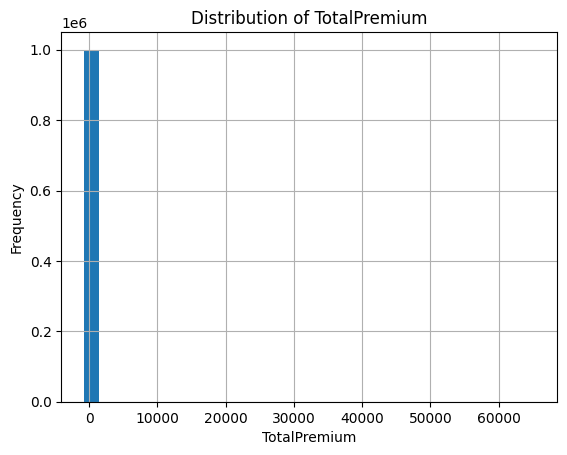

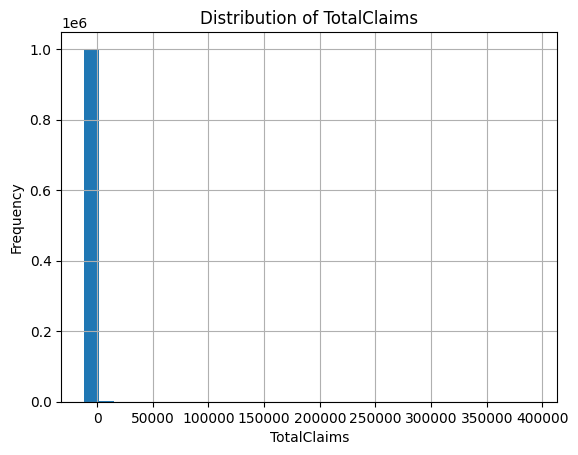

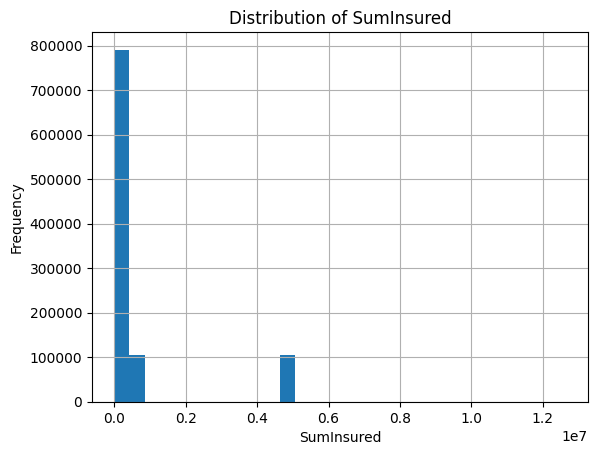

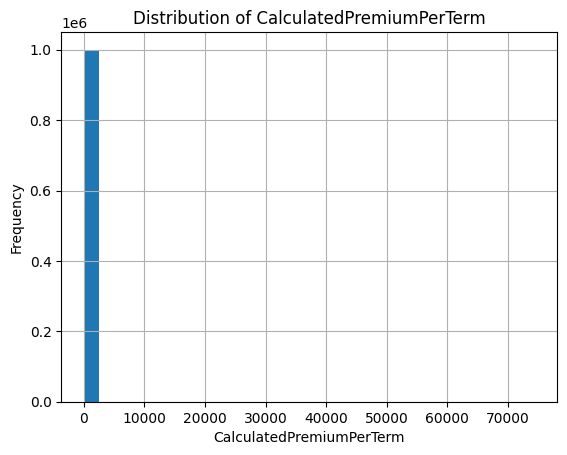

In [30]:
# Plot histograms for numerical columns
plot_histograms(data, payment_claim_columns + ['SumInsured', 'CalculatedPremiumPerTerm'])

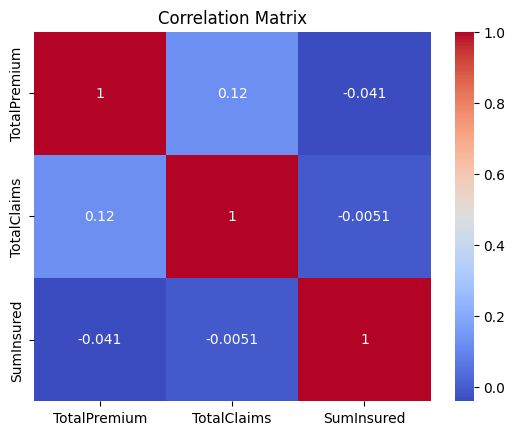

In [31]:
# Plot correlation matrix for selected columns
plot_correlation_matrix(data, payment_claim_columns + ['SumInsured'])

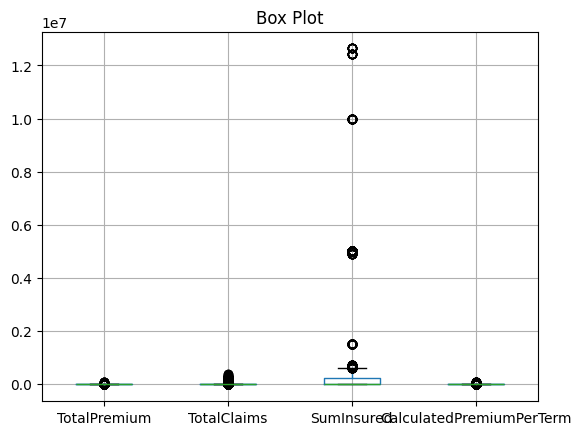

In [56]:
# Detect outliers in numerical data
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
plot_boxplots(data, columns=numerical_columns)


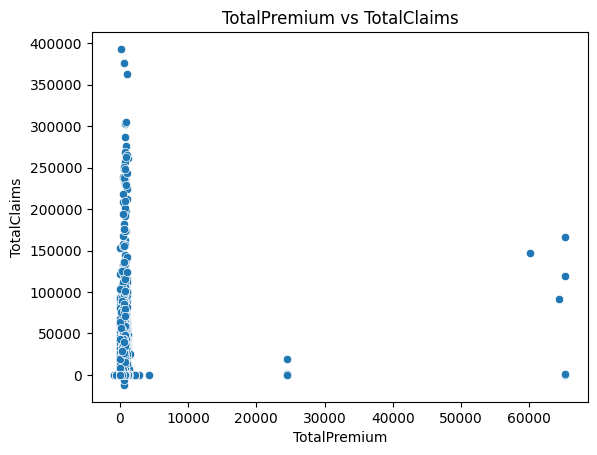

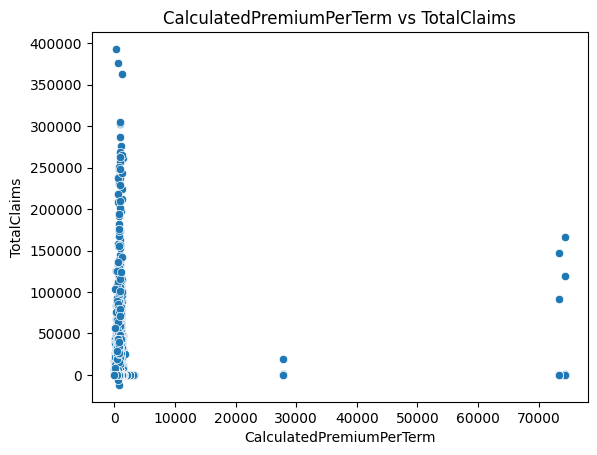

In [33]:
# Plot scatter plots for analyzing relationships between premiums and claims
plot_scatter(data, x='TotalPremium', y='TotalClaims')
plot_scatter(data, x='CalculatedPremiumPerTerm', y='TotalClaims')

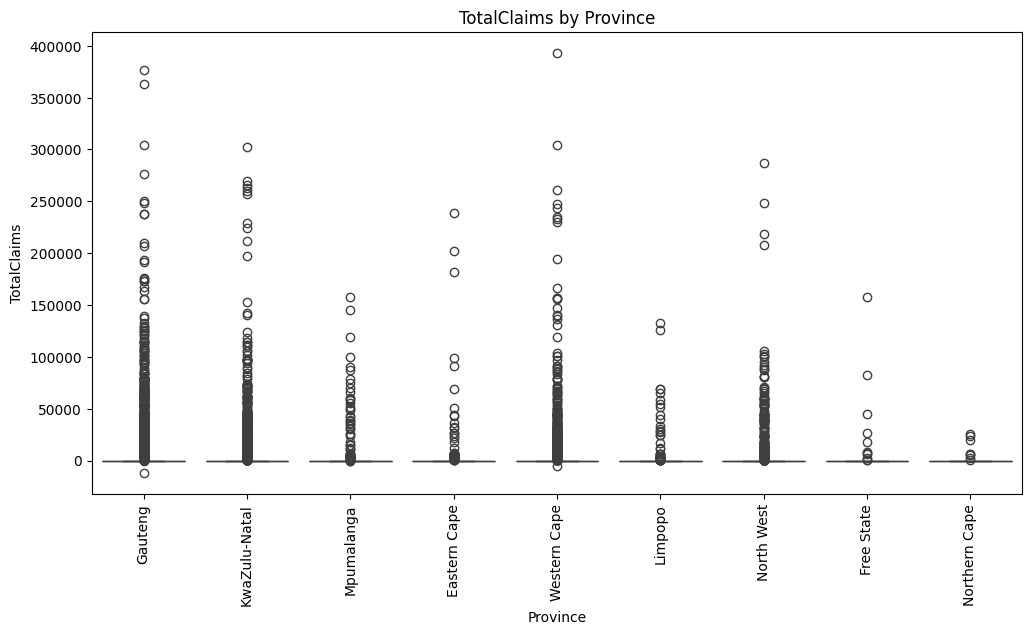

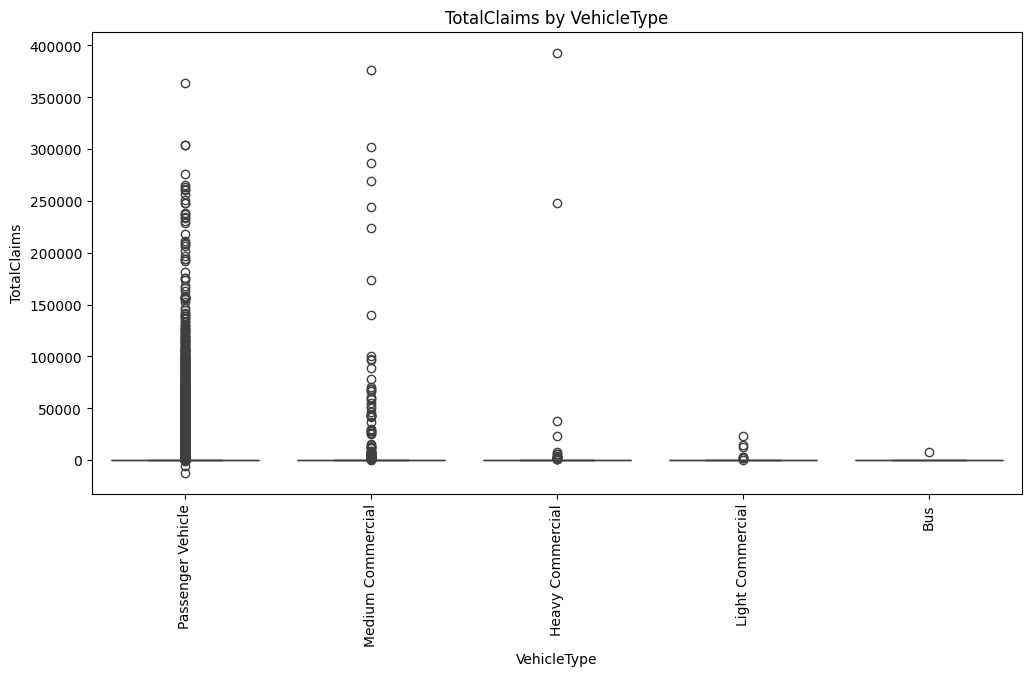

In [39]:
# Plot box plots to analyze the impact of location and vehicle type on claims
plot_boxplot(data, x='Province', y='TotalClaims')
plot_boxplot(data, x='VehicleType', y='TotalClaims')

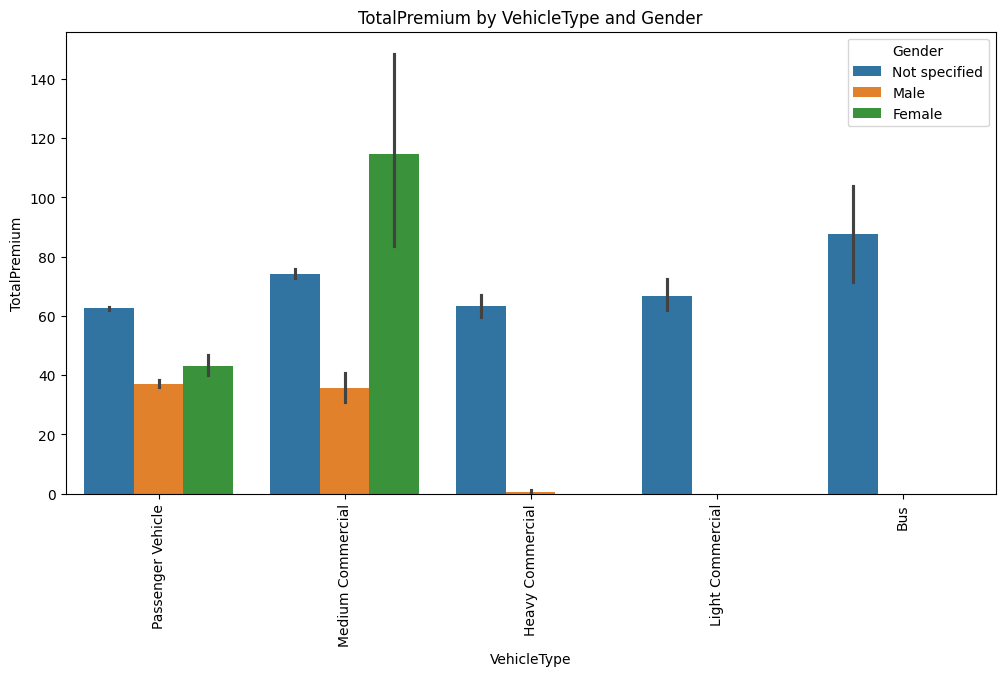

In [51]:
# Plot bar plot to understand the distribution of premiums by vehicle type and gender
plot_bar(data, x='VehicleType', y='TotalPremium', hue='Gender')